In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
advertising = advertising.iloc[:,1:5]
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


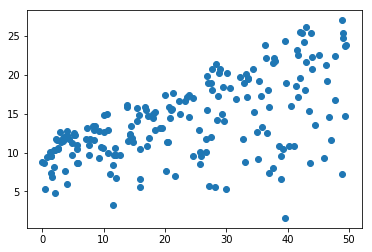

In [3]:
# Independent variable
X = advertising.iloc[:,1:2].values

# Dependent variable
y = advertising.iloc[:,-1].values

plt.scatter(X, y)
plt.show()

In [4]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [5]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

$y = \beta_0 + \beta_1x$

In [6]:
# print the coefficients
β0 = regressor.intercept_
β1 = regressor.coef_
print(β0,β1)

9.36322236242 [ 0.1915064]


In [7]:
# Manual Prediction
#y_manual_pred = β0 + β1*X_test
#y_manual_pred

In [8]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 16.81282137,  15.93189193,  17.3490393 ,  15.77868681,
        16.64046561,  10.35905565,  12.1017639 ,  10.03349477,
        17.3490393 ,  17.77035338,  12.17836646,  15.54887913,
        10.45480885,  13.40400743,  11.6229979 ,  10.30160373,
        16.18085025,  10.85697229,  16.41065793,  12.69543375,
        13.95937599,  10.45480885,  18.49807771,  15.75953617,
        13.38485679,  18.74703603,  15.77868681,  13.25080231,
        17.77035338,  15.98934385,  17.88525722,  11.14423189,
        10.97187613,  12.82948823,  11.58469662,  14.8211548 ,
         9.65048196,  10.72291781,  10.01434413,  12.88694015])

In [9]:
# computing rmse and r^2
mse = mean_squared_error(y_test,y_pred)
print(mse)
r_square = r2_score(y_test,y_pred)
print(r_square)

9.87431599652
0.535346942108


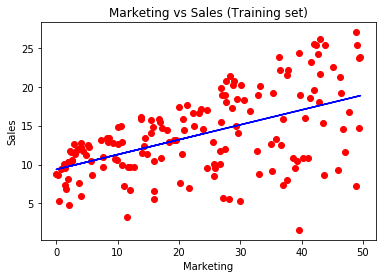

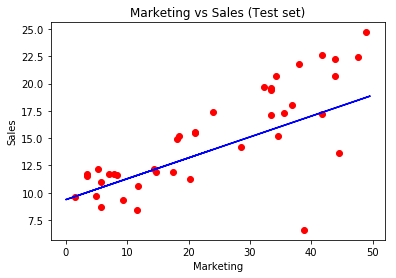

In [10]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marketing vs Sales (Training set)')
plt.xlabel('Marketing')
plt.ylabel('Sales')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marketing vs Sales (Test set)')
plt.xlabel('Marketing')
plt.ylabel('Sales')
plt.show()


In [11]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
#Multiple Linear Regression

# Independent variable
#X = advertising.iloc[:,1:4].values
X = advertising[['TV','radio','newspaper']]
# Dependent variable
#y = advertising.iloc[:,-1].values
y = advertising['sales']

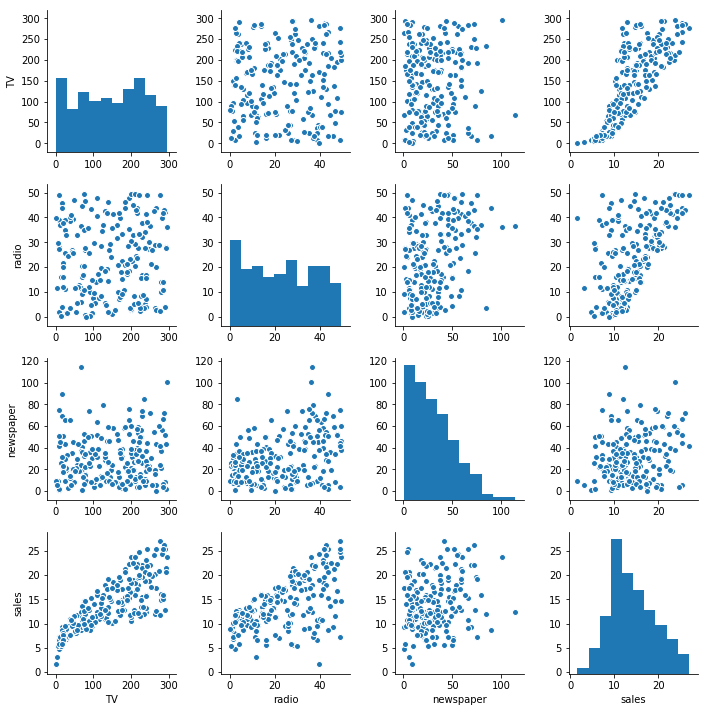

In [13]:
sns.pairplot(data = advertising)
plt.show()

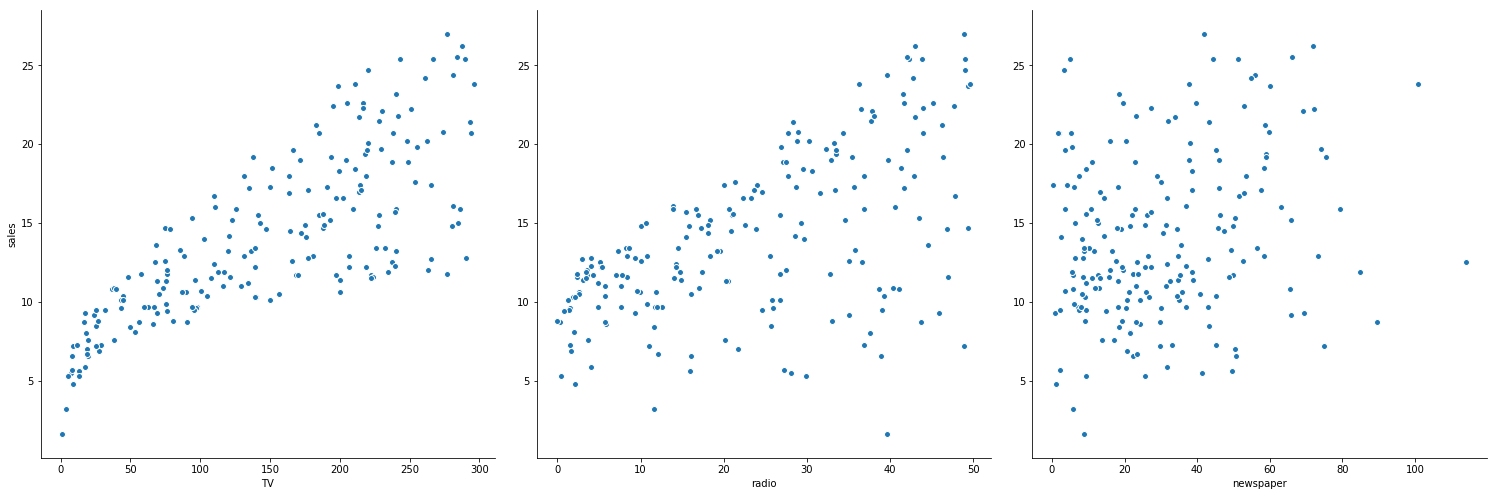

In [14]:
sns.pairplot(data = advertising,x_vars=['TV','radio','newspaper'],y_vars='sales',size=7)
plt.show()

In [15]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [16]:
# Fitting Simple Linear Regression to the Training set
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# print the coefficients
β0 = mlr.intercept_
β1 = mlr.coef_
β0

2.8172751352950005

In [18]:
β1 = pd.DataFrame(β1,X_test.columns,columns=['Coefficient'])
β1

,Coefficient
TV,0.045586
radio,0.185698
newspaper,0.002233


From the above result we may infern that if TV price increses by 1 unit it will affect sales by 0.045 units.

In [19]:
# Predicting the Test set results
y_pred = mlr.predict(X_test)
y_pred

array([ 10.50948755,  20.05723558,  16.82665516,  19.09405782,
        20.94383845,  13.25348896,  11.87554518,  12.4882643 ,
        20.51420388,  20.91328754,  10.90182094,  19.44307823,
         6.5040246 ,  15.3178433 ,   9.04147699,   8.03952046,
        16.26581002,  12.10312044,  17.12086602,  11.28131376,
        17.07036157,   9.84452136,  20.70077487,  17.17479561,
        15.19498306,  21.96631309,  19.1587532 ,  10.09216975,
        19.40214482,  14.88180369,  14.27844074,   7.69173892,
        10.00183154,  14.82404891,   7.29177732,  13.63453936,
         7.59380446,  11.84106127,  13.61631336,  15.18810875])

In [20]:
# computing rmse and r^2
mse = mean_squared_error(y_test,y_pred)
print(mse)
r_square = r2_score(y_test,y_pred)
print(r_square)

1.73329278158
0.918436903228


In [22]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

C:\Users\ankit.bhatia\AppData\Local\Continuum\anaconda3\envs\tensor\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


const        2.817275
TV           0.045586
radio        0.185698
newspaper    0.002233
dtype: float64

In [23]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     427.4
Date:                Wed, 07 Mar 2018   Prob (F-statistic):           5.38e-75
Time:                        17:09:47   Log-Likelihood:                -316.74
No. Observations:                 160   AIC:                             641.5
Df Residuals:                     156   BIC:                             653.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8173      0.357      7.881      0.000       2.111       3.523
TV             0.0456      0.002     29.444      0.000       0.043       0.049
radio          0.1857      0.010     18.012      0.000       0.165       0.206
newspaper      0.0022      0.007      0.325      0.746      -0.011       0.016
==============================================================================
Omnibus:                       43.762   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.253
Skew:                          -1.220   Prob(JB):                     1.53e-20
Kurtosis:                       5.781   Cond. No.                         445.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must be the same size

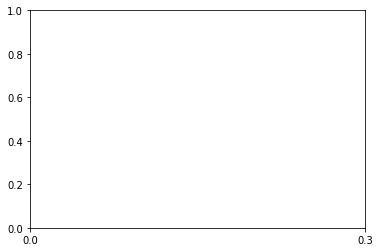

In [61]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marketing vs Sales (Training set)')
plt.xlabel('Marketing')
plt.ylabel('Sales')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marketing vs Sales (Test set)')
plt.xlabel('Marketing')
plt.ylabel('Sales')
plt.show()
